In [12]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
     

ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")

C:\Users\HP\AppData\Local\Temp\ipykernel_14432\3682024646.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [13]:
data['Next_Close'] = data['Close'].shift(-1)
     


# Drop the last row with NaN target
data = data.dropna()
     


# Features: Open, High, Low, Volume
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
     

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)
     

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 901.35


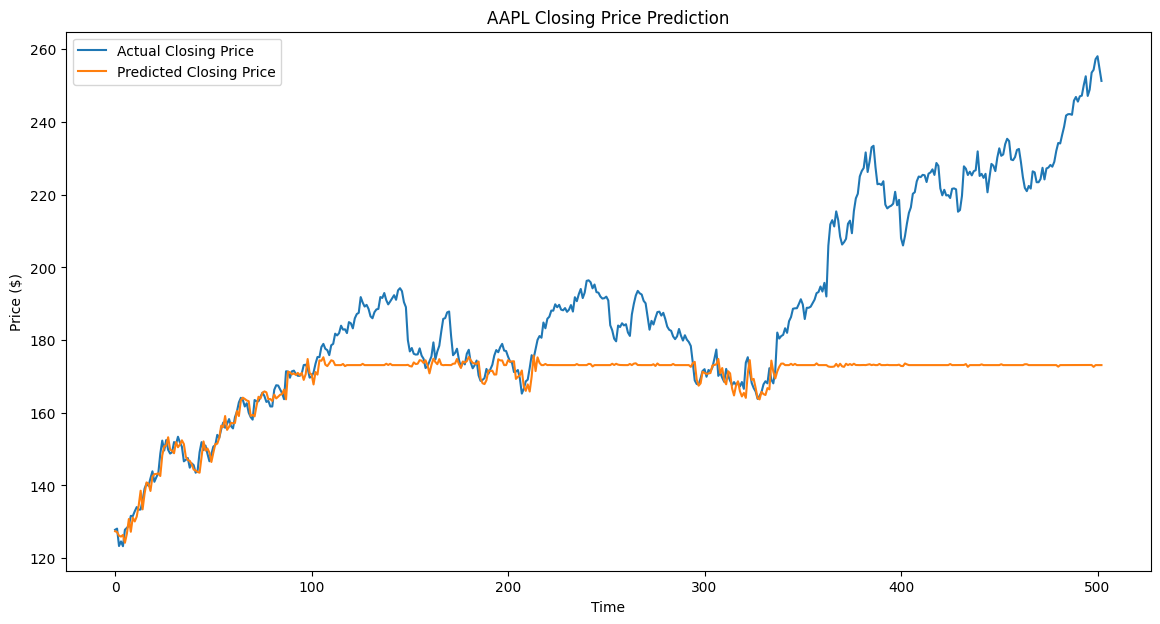

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title(f'{ticker} Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [17]:
ticker = "TSLA"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")

C:\Users\HP\AppData\Local\Temp\ipykernel_14432\2991140104.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [18]:

# Next day's close
data['Next_Close'] = data['Close'].shift(-1)
data = data.dropna()

# Features
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']
     


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
     


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
     

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
     

Mean Squared Error: 79.47


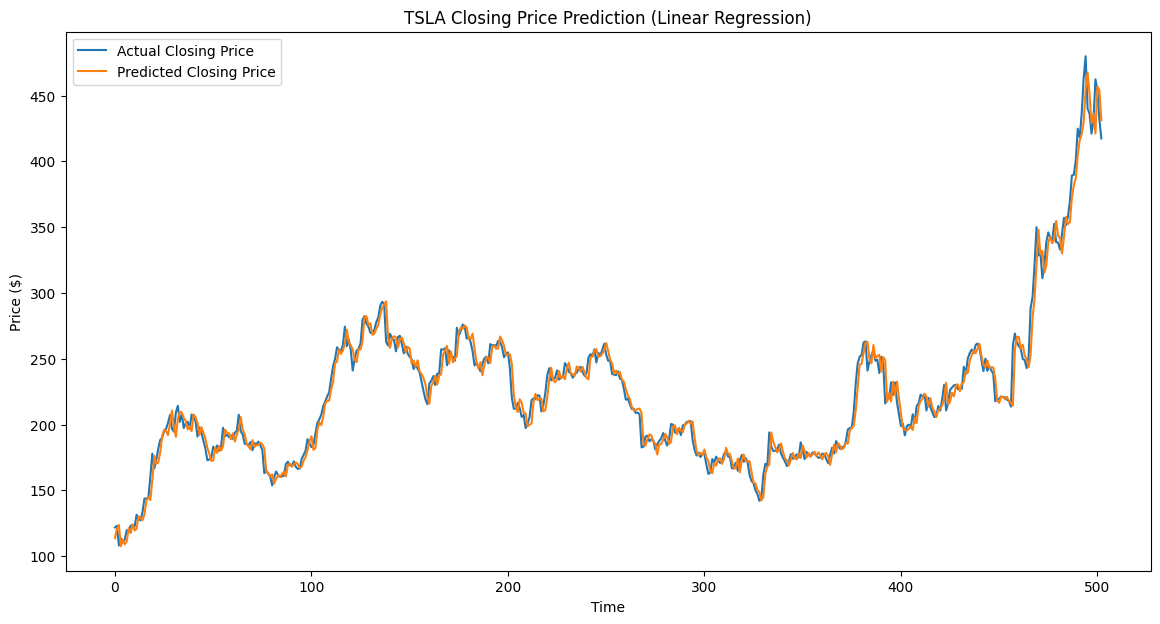

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title(f'{ticker} Closing Price Prediction (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
